# Actividad 11

## Contexto

Utilizando la herramienta de keras models online, se realizó un entrenamiento de un modelo de una red neuronal. Esto utilizando un amplio catálogo de ropa que era de distinto color. El modelo estaba encargado de delimitar si una prenda es de algún color. Por ende, se tenía que compartir una gran cantidad de ejemplos para que el modelo pudiera aprender. El modelo fue cargado y a continuación se hará solo una demostración de una predicción

In [19]:
#Funciones y librerias
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

from tensorflow.keras.layers import DepthwiseConv2D
from tensorflow.keras.models import load_model

In [11]:
import tensorflow as tf

In [13]:
print(tf.__version__)

2.18.0


In [7]:
np.set_printoptions(suppress=True) #Se des habilita la notación científica

In [23]:
# Define a custom layer with 'groups' argument
class CustomDepthwiseConv2D(DepthwiseConv2D):
    def __init__(self, *args, **kwargs):
        if 'groups' in kwargs:
            del kwargs['groups']  # Remove the 'groups' argument
        super().__init__(*args, **kwargs)

# Load the model with the custom object
model = load_model(r"C:\MIGUEL\Máster\Modulo 1\models\Tarea11\keras_model.h5", custom_objects={'DepthwiseConv2D': CustomDepthwiseConv2D})

C:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Load the labels
class_names = open(r"C:\MIGUEL\Máster\Modulo 1\data\interim\Tarea11/labels.txt", "r").readlines()

In [27]:
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [37]:
image = Image.open(r"C:\MIGUEL\Máster\Modulo 1\data\raw\Tarea11\black_pants\664ded0a355f104499e144c6f19ac11ce8b05c98.jpg").convert("RGB")

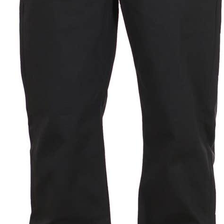

In [45]:
image

In [39]:
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

In [41]:
image_array = np.asarray(image)

In [43]:
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Class: black pants
Confidence Score: 0.99994695


Tal como se observa, con un score de confianza de 99.99% el modelo predice de manera correcta.